In [22]:
#import Git4
import math
%run Git4.py

In [23]:
day_month

[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# WRE Project

### Calibration

1. Report the best fit parameters for the hydrological model.

In [24]:
# Pest Parameters
# Valeur empirique trouvée par itération de l'algo
best_param = [1.00000000e-07, 1.18112505e+01, 8.00374772e+01, 1.36199741e+03]
K_sat=1e-7
best_param = [1.224e-5, 6.8311, 64.5218, 581.1]


c=10                # [-] exponent of ksat for the equation k = ksat * s^c
t_sub=200            # [h] mean sub-superficial residence time
z=1000 

A=4000*1e6

4. Plot Markov chains of the calibrated parameters and sequences of values of N S and
TSA as a function of the number of iterations. Only plot accepted parameter sets.

### Hydrological variables

In [25]:
[Q, R, I, s, L, ET]=Git4.hydr_model(K_sat, c, t_sub, z, precipitation, K_c, n_years=6, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)

2. Plot the time series (6-year-long) of precipitation in [mm/h], run off in [mm/h],
infiltration in [mm/h], soil moisture, leakage in [mm/h] and evapotranspiration in
[mm/h] for the calibrated hydrological model forced by the given precipitation).

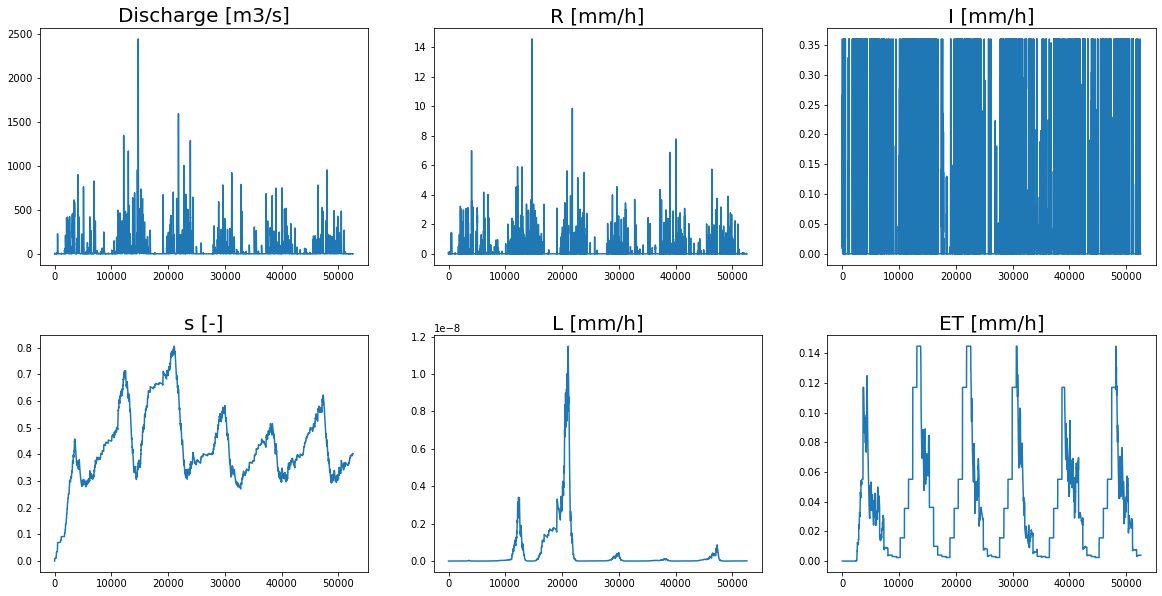

In [26]:
plot_model(K_sat, c, t_sub, z, precipitation, K_c, n_years=6, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)

### Discharge


3. Plot the time series of observed discharge and of the discharge as simulated by the
hydrological model with the best fit parameters.

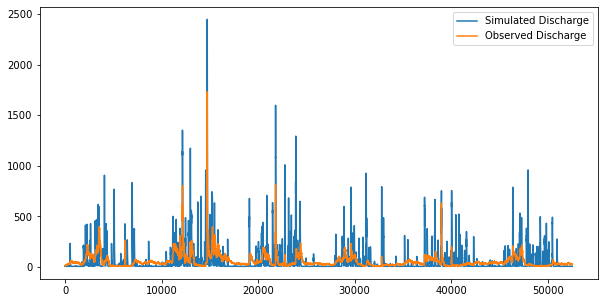

In [27]:
figure=plt.figure(figsize=(10,5))
plt.plot(Q, label="Simulated Discharge")
plt.plot(Q_obs,label="Observed Discharge")

plt.legend()

Attention, si ne marche pas, problème A, plusieurs variables A

### Generation of precipitation

5. Plot the comparison between the statistics (mean, standard deviation, αand λ) of
the observed and generated precipitation

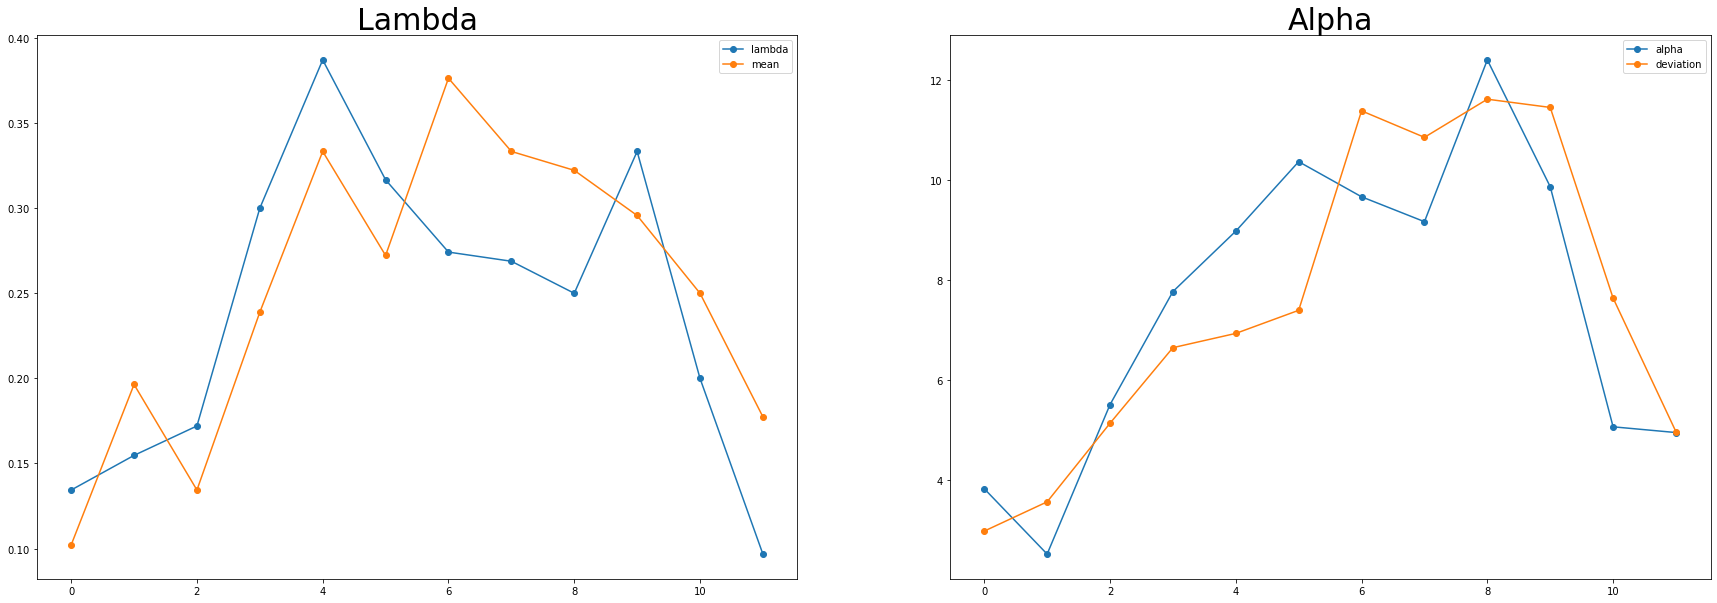

In [28]:
P=rain_gen(years=100,plot=True)

### Simulation of hydrological variables

6. Plot the time series (100-year-long) of generated precipitation in [mm/h], run off in
[mm/h], infiltration in [mm/h], soil moisture, leakage in [mm/h] and evapotran-
spiration in [mm/h] for the calibrated hydrological model forced by the generated
precipitation)

In [29]:
[Q, R, I, s, L, ET]=hydr_model(K_sat, c, t_sub, z, P, K_c, n_years=100, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)


In [30]:
len(P)

876000

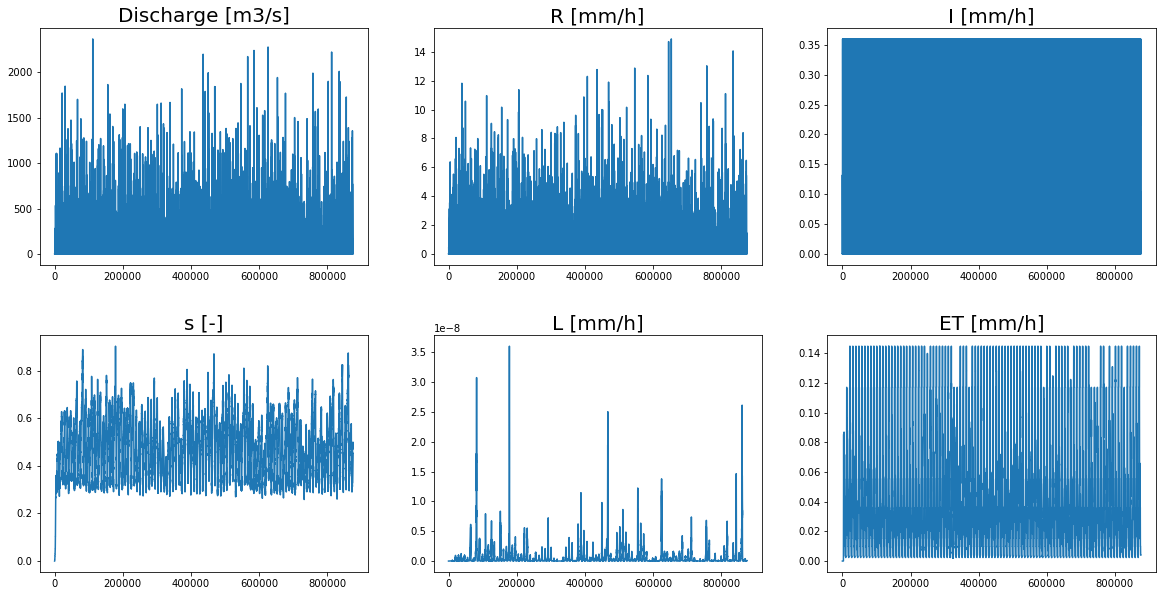

In [31]:
plot_model(K_sat, c, t_sub, z, P, K_c, n_years=100, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)

### Reservoir Area and Volume Rating curves

7. Plot the area and the volume rating curves for the given levels.

Text(0.5, 1.0, 'Area Rating curve')

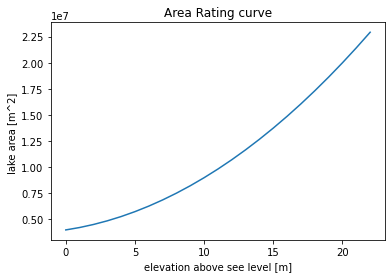

In [32]:
elevation=[k for k in range (0,23)]
figure=plt.figure(figsize=(6,4))
plt.plot(elevation,A_rating)
plt.xlabel("elevation above see level [m]")
plt.ylabel("lake area [m^2] ")
plt.title("Area Rating curve")

Text(0.5, 1.0, 'Volume Rating curve')

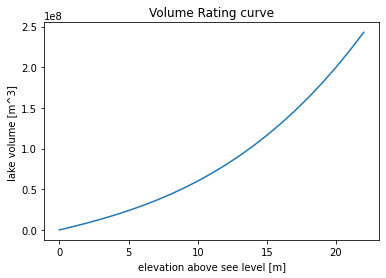

In [33]:
V_rating=vol_rat_curve(A_rating)
figure=plt.figure(figsize=(6,4))
plt.plot(elevation,V_rating)
plt.xlabel("elevation above see level [m]")
plt.ylabel("lake volume [m^3] ")
plt.title("Volume Rating curve")

### Discharge and reservoir routine

8. Report the minimum flow (discharge that is equalled or exceeded 95% of the time)
of the generated discharge and plot the discharge duration curves

Q347= 7.00000011264852 m3/s


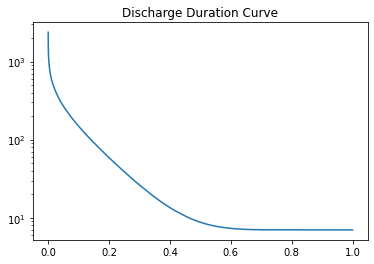

In [117]:
print("Q347= " +str(Q_347(Q, plot=True))+" m3/s") # m3/s

9. For a maximum level for hydroelectric use of 15 m, plot the time series (100 years
long) of input discharge, output discharge, volume within the reservoir and level

In [118]:
P=rain_gen(years=6,plot=False)
#Energy_price=75
[Q, R, I, s, L, ET]=hydr_model(K_sat, c, t_sub, z, P, K_c, n_years=6, s_0 = 0, V_sup_0 = 0, V_sub_0 = 0)
[V,l,A_sluice,Q_out,Q_HU,Q_g,Pow,profit,p_flood,E_annual]=reservoir_routine(Q,P,ET,V_rating,lmax_HU=15)

NameError: name 'Energy_price' is not defined

In [119]:
Energy_price

75

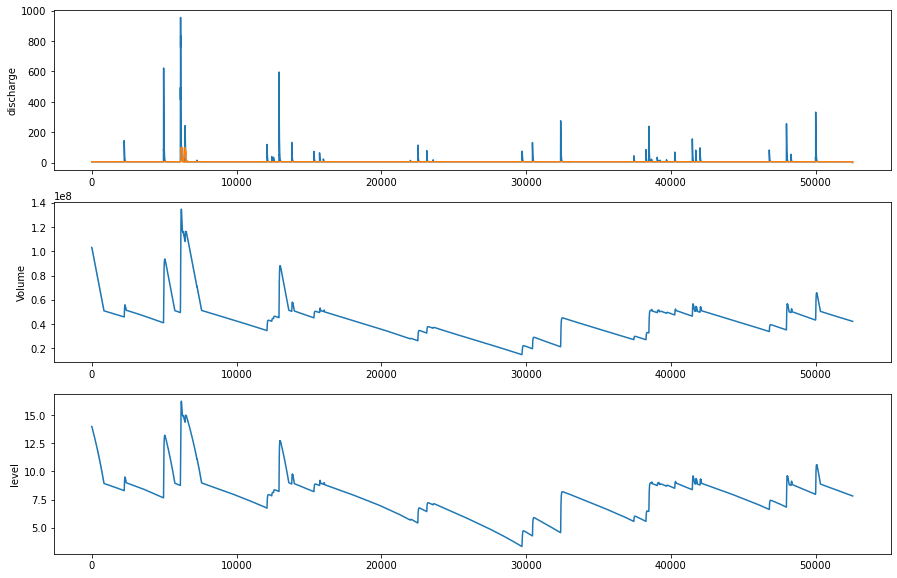

In [171]:
plot_routine(Q,Q_out,V,l)

10. Plot the average annual energy production in [GWh] and the probability that Qout
exceeds Qlim for different values of the maximum level for hydroelectrical use.

In [172]:
lmax=np.linspace(9,19,21)
energy=[]
money=[]
for l in lmax:
    [V,l,A_sluice,Q_out,Q_HU,Q_g,Pow,profit,p_flood,E_annual]=reservoir_routine(Q,P,ET,V_rating,lmax_HU=l)
    energy.append(E_annual)
    money.append(profit)

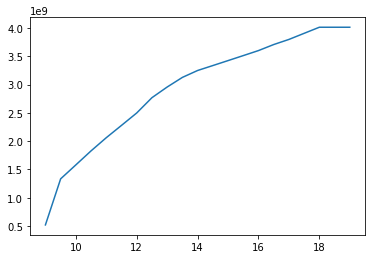

In [173]:
plt.plot(lmax,money)